# Bitcoin dominance strategy

In this notebook we will see a strategy that will rely on bitcoin dominance. When bitcoin dominance goes down, money flows into the altcoins. We will check here: <br>
    1. How related bitcoin dominance is related with price movement of altcoins <br>
    2. How profitable this strategy could have been 

In [100]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint


# Load data

### crypto data

In [197]:
data = pd.read_csv("archive/coin-dance-market-cap-historical.csv")

In [198]:
data["Total Market Cap"] = data["Altcoin Market Cap"] + data["Bitcoin Market Cap"]
data["Bitcoin dominance"] = data["Bitcoin Market Cap"] / data["Total Market Cap"]
data["Label"] = pd.to_datetime(data["Label"])
data = data.rename(columns = {"Label":"date"})
data = data.set_index("date")

<AxesSubplot:xlabel='date'>

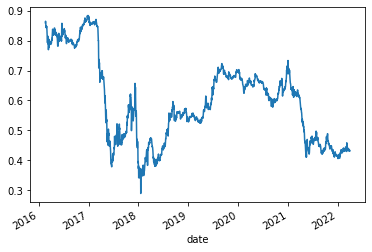

In [199]:
data["Bitcoin dominance"].plot()

### Defi data

In [200]:
data_defi_tvl = pd.read_json("archive/tvl_defi.json")
data_defi_tvl = data_defi_tvl.set_index("date")

<AxesSubplot:xlabel='date'>

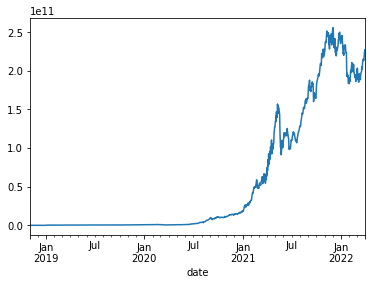

In [201]:
data_defi_tvl["totalLiquidityUSD"].plot()

### coins data

In [202]:
eth_Ticker = yf.Ticker("ETH-USD")
eth_data = eth_Ticker.history(period="max")

In [203]:
one_Ticker = yf.Ticker("ONE1-USD")
one_data = one_Ticker.history(period="max")

<AxesSubplot:xlabel='Date'>

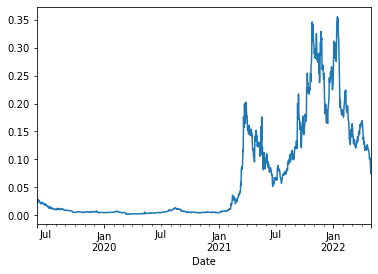

In [204]:
one_data["Close"].plot()

# Let's test for cointegration starting from june 2019, one year before defi summer

In [205]:
one_data = one_data.reset_index()
one_data = one_data[(one_data["Date"] >= "2019-06-01") & (one_data["Date"] <= "2022-03-31")]

In [206]:
eth_data = eth_data.reset_index()
eth_data = eth_data[(eth_data["Date"] >= "2019-06-01") & (eth_data["Date"] <= "2022-03-31")]

In [207]:
data_defi_tvl = data_defi_tvl.reset_index()
data_defi_tvl = data_defi_tvl[(data_defi_tvl["date"] >= "2019-06-01") & (data_defi_tvl["date"] <= "2022-03-31")]

In [208]:
data = data.reset_index()
data = data[data["date"] >= "2019-06-01"]

<AxesSubplot:xlabel='Date'>

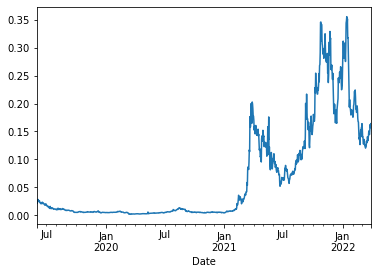

In [209]:
one_data.set_index("Date")["Close"].plot()

<AxesSubplot:xlabel='date'>

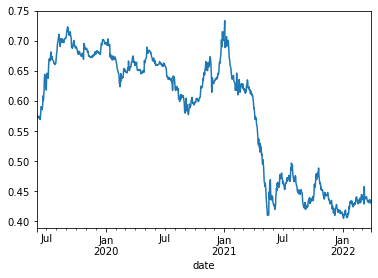

In [210]:
data.set_index("date")["Bitcoin dominance"].plot()

<AxesSubplot:xlabel='Date'>

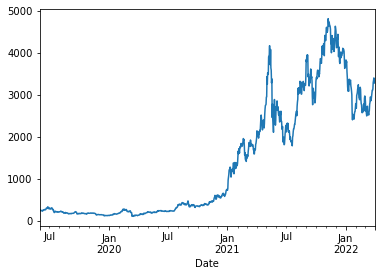

In [211]:
eth_data.set_index("Date")["Close"].plot()

### Let's first test cointegration with eth

https://github.com/simaki/cointanalysis </br>
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.coint.html </br>
https://medium.com/bluekiri/cointegration-tests-on-time-series-88702ea9c492

In [226]:
coint_eth = coint(eth_data.set_index("Date")["Close"].to_numpy(),data.set_index("date")["Bitcoin dominance"].to_numpy())

In [227]:
print(f"The p-value for cointegration is {coint_eth[1]} which is representative at the 10% level")

The p-value for cointegration is 0.09503864632967324 which is representative at the 10% level


In [216]:
coint_one = coint(one_data.set_index("Date")["Close"].to_numpy(),data.set_index("date")["Bitcoin dominance"].to_numpy())

In [225]:
print(f"The p-value for cointegration is {coint_one[1]} which is representative at the 10% level")

The p-value for cointegration is 0.055097233389981605 which is representative at the 10% level


In [221]:
coint_defi = coint(data_defi_tvl.set_index("date")["totalLiquidityUSD"].to_numpy(),data.set_index("date")["Bitcoin dominance"].to_numpy())

In [224]:
print(f"The p-value for cointegration is {coint_defi[1]} which is representative at the 10% level")

The p-value for cointegration is 0.06772154573804745 which is representative at the 10% level


# Strategy definition

Let's consider a medium/long strategy where each time bitcoin dominance falls down of 10% in a defined timeframe, we buy the asset and sell it when the dominance goes back up